***Lab -9***

**Name - Mohammed Abuzar Younus**<br>
**Student ID - 8903244**

**1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with**

Step 1: Load the fMNIST Dataset

We'll start by importing the necessary libraries and loading the fMNIST dataset using Keras Datasets.

In [37]:
import tensorflow as tf
import numpy as np

# Load the fMNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
from tensorflow.keras.models import Sequential
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Step 2: Data Description
Let's begin by understanding the basic information about the dataset, such as the shape of the data, the number of classes, and the distribution of data.

In [38]:
# Shape of the data
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of testing images:", test_images.shape)
print("Shape of testing labels:", test_labels.shape)

# Number of classes
num_classes = len(set(train_labels))
print("Number of classes:", num_classes)

# Class distribution in the training set
class_counts = tf.math.bincount(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i, class_name in enumerate(class_names):
    print(f"Class {i}: {class_name}, Count: {class_counts[i]}")


Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing images: (10000, 28, 28)
Shape of testing labels: (10000,)
Number of classes: 10
Class 0: T-shirt/top, Count: 6000
Class 1: Trouser, Count: 6000
Class 2: Pullover, Count: 6000
Class 3: Dress, Count: 6000
Class 4: Coat, Count: 6000
Class 5: Sandal, Count: 6000
Class 6: Shirt, Count: 6000
Class 7: Sneaker, Count: 6000
Class 8: Bag, Count: 6000
Class 9: Ankle boot, Count: 6000


Step 3: Data Visualization
Visualizing the data can provide insights into the distribution of classes and the content of the images.

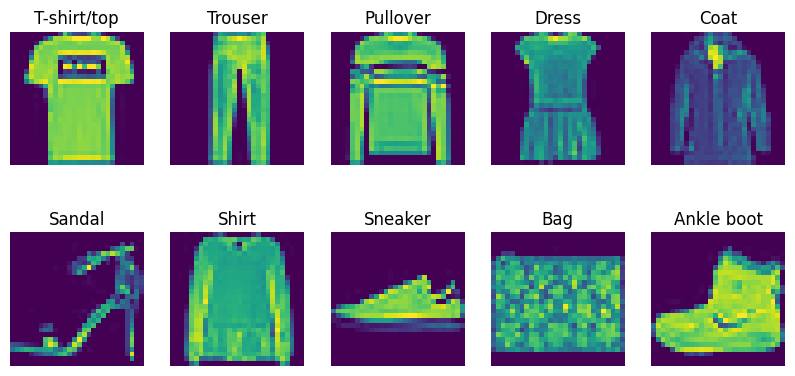

In [39]:
import matplotlib.pyplot as plt

# Display sample images from each class
plt.figure(figsize=(10, 10))
for i in range(num_classes):
    index = next((idx for idx, label in enumerate(train_labels) if label == i), None)
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[index])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

Step 4: Data Preprocessing
Before feeding the data into a machine learning model, it's essential to preprocess it. In the case of images, we can scale the pixel values to a range of [0, 1] and reshape the images if needed.

In [40]:
# Data Preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to a 4D tensor (num_samples, height, width, channels)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Verify the new shape
print("New shape of training images:", train_images.shape)
print("New shape of testing images:", test_images.shape)


New shape of training images: (60000, 28, 28, 1)
New shape of testing images: (10000, 28, 28, 1)


Step 5: Splitting Data (Optional)
If needed, we can split the training data into a smaller training set and a validation set to evaluate the model during training.

In [41]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Verify the shapes of the split datasets
print("Shape of training images:", train_images.shape)
print("Shape of validation images:", val_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of validation labels:", val_labels.shape)


Shape of training images: (48000, 28, 28, 1)
Shape of validation images: (12000, 28, 28, 1)
Shape of training labels: (48000,)
Shape of validation labels: (12000,)


**2. Train a dense neural network using Keras**

Step 1: Build the Dense Neural Network
Now, we create a dense neural network using the Keras Sequential API.

In [42]:
# Build the dense neural network model

from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),      # Dense layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')     # Dense layer with 10 neurons (output classes) and softmax activation
])


Step 2: Compile the Model

In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Step 3: Train the Model

In [44]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)
# Predict labels for the test dataset
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

Epoch 1/10
1200/1200 [==============================] - 5s 3ms/step - loss: 0.5471 - accuracy: 0.8090 - val_loss: 0.4248 - val_accuracy: 0.8485
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.4062 - accuracy: 0.8549 - val_loss: 0.3800 - val_accuracy: 0.8639
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3614 - accuracy: 0.8698 - val_loss: 0.3518 - val_accuracy: 0.8726
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3340 - accuracy: 0.8788 - val_loss: 0.3656 - val_accuracy: 0.8648
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3122 - accuracy: 0.8854 - val_loss: 0.3272 - val_accuracy: 0.8808
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2927 - accuracy: 0.8932 - val_loss: 0.3196 - val_accuracy: 0.8788
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2816 - accuracy: 0.8967 - val_loss: 0.3386 - val_accuracy:

<br>

**3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration**

In [45]:
import numpy as np
prediction = model.predict(test_images)
display(prediction)
# Every row has 10 classes, each with a probability
print('total data in test_images',len(prediction))
prediction_labels = np.argmax(prediction, axis=1)
print(prediction_labels)

313/313 [==============================] - 1s 2ms/step


array([[1.2597027e-06, 1.2061073e-09, 3.6445734e-08, ..., 1.2814967e-02,
        1.3280063e-06, 9.8428798e-01],
       [4.5105247e-05, 3.5432790e-13, 9.8919326e-01, ..., 7.4912653e-18,
        3.7985098e-11, 1.5913748e-15],
       [3.8149153e-07, 9.9999952e-01, 5.3754561e-09, ..., 4.3047829e-17,
        2.9614108e-12, 1.1530760e-14],
       ...,
       [5.0872266e-05, 8.9927779e-12, 2.5259027e-05, ..., 5.0390586e-08,
        9.9958581e-01, 3.0273792e-09],
       [1.1769561e-07, 9.9993312e-01, 2.1128373e-07, ..., 8.9276329e-12,
        6.8362693e-09, 1.5013521e-08],
       [6.6364114e-06, 1.8462124e-08, 7.5428220e-06, ..., 3.6607933e-04,
        2.2320210e-05, 6.8843169e-06]], dtype=float32)

total data in test_images 10000
[9 2 1 ... 8 1 5]


Step 1: Evaluate the Model

In [46]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.3707158863544464
Test Accuracy: 0.870199978351593


Step 2: Evaluate Accuracy and Confusion Matrix

[[806   0   5  30   1   1 151   1   5   0]
 [  2 952   1  32   5   0   6   0   2   0]
 [ 22   1 703  20  76   0 178   0   0   0]
 [ 22   2   6 911  22   0  36   0   1   0]
 [  1   0  74  48 730   1 146   0   0   0]
 [  0   0   0   1   0 957   0  19   1  22]
 [103   0  37  32  36   0 790   0   2   0]
 [  0   0   0   0   0  22   0 943   1  34]
 [  5   0   1   8   8   3  16   3 956   0]
 [  0   0   0   1   0   5   1  39   0 954]]


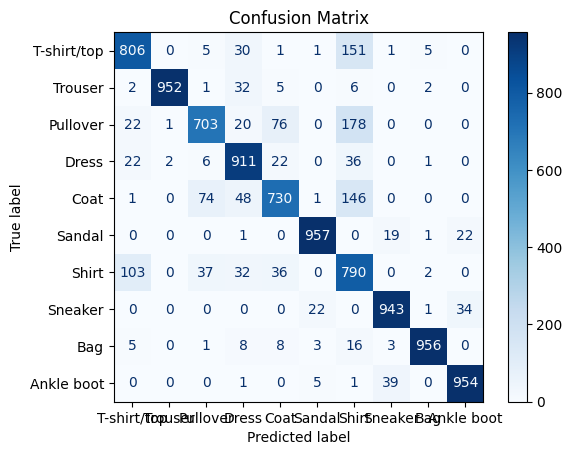

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ...

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)
print(cm)
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")

plt.show()


Step 3: Explore Incorrect Classifications

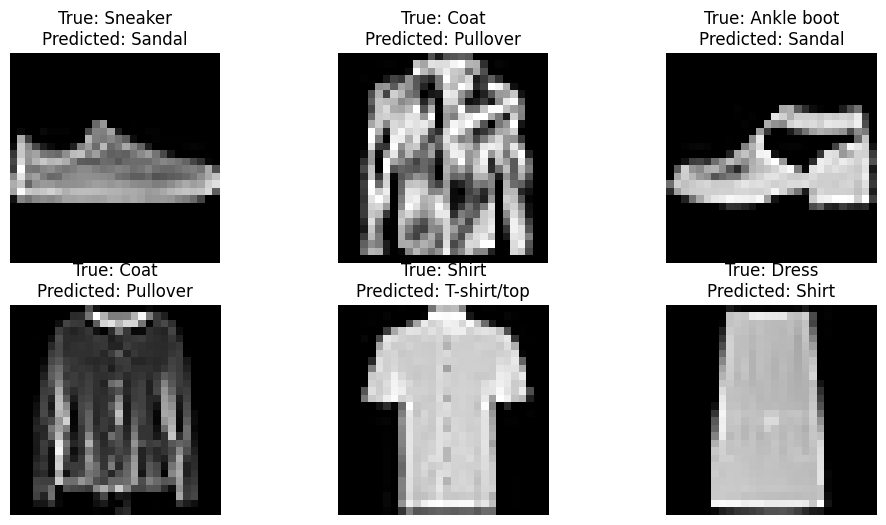

In [48]:
# Find indices of misclassified images
misclassified_indices = np.where(test_labels != y_pred_labels)[0]

# Display some of the misclassified images along with their predicted and true labels
plt.figure(figsize=(12, 6))
for i in range(min(6, len(misclassified_indices))):
    idx = misclassified_indices[i]
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[test_labels[idx]]}\nPredicted: {class_names[y_pred_labels[idx]]}")
    plt.axis('off')
plt.show()